In [353]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

# TODO:
TODO: Write about theorem 2.56
TODO: Write the formula for how to calculate confidence interval
TODO: none vs Paired t-test


# Plots

## Box plot

## Scatter 

## QQ - plot
The plots shows the sample data on the Y-axis
the x-axis are the values if they followed the noraml distribution perfectly 
a diagonal line is plotted for reference if the data points follows the diagonal line then the data follows a normal distribution

# Random Varibles

TODO: Write about theorem 2.56

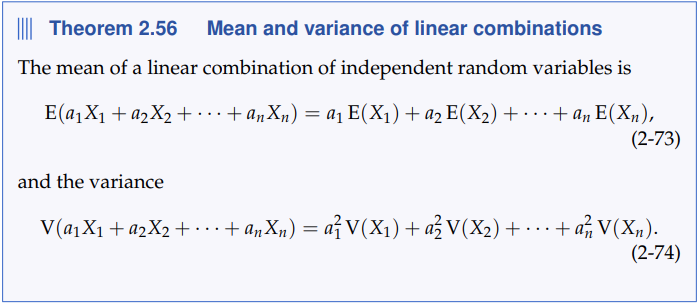

### Calculate Variance:

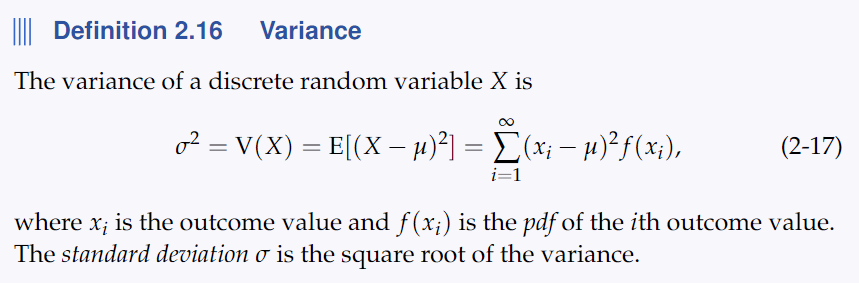


In [354]:
import numpy as np

# Define the values and probabilities
x = np.array([0, 1, 2, 4])  # Values of the random variable
f = np.array([0.17, 0.22 ,0.28, 0.33])  # Probabilities

# Calculate the mean
mean = np.sum(x * f)
print(f"Mean: {mean:.2f}")

# Calculate the variance
variance = np.sum((x - mean)**2 * f)
print(f"Variance: {variance:.2f}")

Mean: 2.10
Variance: 2.21


# Distributions


Discrete distributions:
- Binomial distribution
- Hypergeometric distribution
- Poisson distribution

Contiunous distribution:
- Uniform distribution
- Normal Distribution
- Exponential Distribtion

## Binomial distribution
1. **Mean (Expected Value):** $\mathbb{E}[X] = n \cdot p$
2. **Variance:** $\text{Var}(X) = n \cdot p \cdot (1 - p)$
3. **Standard Deviation:** $\sigma = \sqrt{n \cdot p \cdot (1 - p)}$

### Binom PMF P(X = K)


In [355]:
# Parameters for the binomial distribution
n = 10      # number of trials
p = 0.6     # probability of success
k = 5       # Testing Value

# P(X = 5)
retval_eq_k = stats.binom.pmf(k=k ,n=n, p=p)

# Print result
print(f"P(X = {k}) = {retval_eq_k}")

# Get mean and variance
mean, var = stats.binom.stats(n=n, p=p)
print(f"Mean: {mean}")
print(f"Variance: {var}")

P(X = 5) = 0.20065812480000006
Mean: 6.0
Variance: 2.4000000000000004


### Binom CDF: P(X > k)

In [356]:
# Parameters for the binomial distribution
n = 6       # number of trials
p = 0.35      # probability of success
k = 1        # Testing Value

# P(X > k)
retval_greater_than_k = 1 - stats.binom.cdf(k, n, p)  # CDF for k
# Print result
print(f"P(X > {k}) = {retval_greater_than_k}")

# Get mean and variance
mean, var = stats.binom.stats(n=n, p=p)
print(f"Mean: {mean}")
print(f"Variance: {var}")

P(X > 1) = 0.680920078125
Mean: 2.0999999999999996
Variance: 1.3649999999999998


### Binom CDF: P(X < k)

In [357]:
# Parameters for the binomial distribution
n = 6       # number of trials
p = 0.35      # probability of success
k = 2        # Testing Value

# P(X < 5) = P(X <= k)
retval_less_than_k = stats.binom.cdf(k - 1, n, p)  # CDF for k - 1'
print(f"P(X < {k}) = {retval_less_than_k}")

# Get mean and variance
mean, var = stats.binom.stats(n=n, p=p)
print(f"Mean: {mean}")
print(f"Variance: {var}")

P(X < 2) = 0.319079921875
Mean: 2.0999999999999996
Variance: 1.3649999999999998


## Poisson distribution
1. **Mean (Expected Value):** $ \mathbb{E}[X] = \lambda $
2. **Variance:** $ \text{Var}(X) = \lambda $
3. **Standard Deviation:** $ \sigma = \sqrt{\lambda} $


### Connection Between Poisson and Exponential Distributions

The **Poisson** and **Exponential** distributions are closely related as they both arise from **Poisson processes**, which model events occurring randomly over time or space.

#### 1. Connection
- The **Poisson distribution** models the **number of events** that occur in a fixed interval of time or space, given a constant rate \( \lambda \).
- The **Exponential distribution** models the **time between consecutive events** in a Poisson process, also with rate \( \lambda \).
- Key Relationship:
  - If events follow a Poisson process:
    - The count of events in an interval is Poisson distributed.
    - The time until the next event (or between events) is exponentially distributed.

#### 2. When to Use Poisson
Use the Poisson distribution when you need to calculate the **probability of a specific number of events** occurring in a fixed interval. Examples include:
- The number of calls received by a call center in an hour.
- The number of accidents occurring on a highway in a day.

#### 3. When to Use Exponential
Use the Exponential distribution when you want to model the **time between events** in a Poisson process. Examples include:
- The time until the next customer arrives at a service desk.
- The time between failures of a machine.

### Poisson PMF: P(X = k)

In [358]:
# Parameters for Poisson distribution
lambda_val = 10/4  # mean (expected number of events)

k = 10           # number of events we want the probability for

# Calculate Poisson PMF
poisson_pmf = stats.poisson.pmf(k, lambda_val)
print(f"P(X = {k}) = {poisson_pmf}")

P(X = 10) = 0.00021572518449585165


### Poisson CDF: P(X < k)

In [359]:
# Parameters for Poisson distribution
lambda_val = 15/6  # mean (expected number of events)
k = 2           # upper limit of events for cumulative probability

# Calculate Poisson CDF for P(X < k), which is actually P(X <= k-1)
poisson_cdf = stats.poisson.cdf(k - 1, lambda_val)

print(f"P(X < {k}) = {poisson_cdf}")


P(X < 2) = 0.2872974951836458


### Poisson CDF: P(X > k)

In [360]:

# Parameters
lambda_val = 15/6  # mean (expected number of events)
k = 2           # lower limit of events for the "greater than" probability

# Calculate Poisson CDF for P(X > k)
poisson_prob_greater = 1 - stats.poisson.cdf(k, lambda_val)

print(f"P(X > {k}) = {poisson_prob_greater}")

P(X > 2) = 0.4561868841166703


## Hypergeometric distribution

Let $X \sim \text{Hypergeometric}(N, K, n)$, where:
- $N$ is the population size,
- $K$ is the number of successes in the population,
- $n$ is the number of draws.

1. **Mean (Expected Value):** $\mathbb{E}[X] = n \cdot \frac{K}{N}$


2. **Variance:** $\text{Var}(X) = n \cdot \frac{K}{N} \cdot \frac{N - K}{N} \cdot \frac{N - n}{N - 1}$


3. **Standard Deviation:** $\sigma = \sqrt{n \cdot \frac{K}{N} \cdot \frac{N - K}{N} \cdot \frac{N - n}{N - 1}}$

### Hyper PMF: P(X = k)

In [361]:
# Parameters for the hypergeometric distribution
N = 20       # Total population size
K = 12       # Number of successes in the population
n = 10       # Sample size
k = 5        # Testing value for exactly 5 successes

# P(X = k)
retval_equal_to_k = stats.hypergeom.pmf(k, N, K, n)  # PMF for k
print(f"P(X = {k}) = {retval_equal_to_k:.4f}")

mean, var = stats.hypergeom.stats(N, K, n)
print(f"Mean: {mean}")
print(f"Variance: {var}")

P(X = 5) = 0.2401
Mean: 6.0
Variance: 1.263157894736842


### Hyper CDF: P(X < k)

In [362]:
# Parameters for the hypergeometric distribution
N = 10       # Total population size
K = 7       # Number of successes in the population
n = 3       # Sample size

k = 2        # Testing threshold

# P(X < 5) = P(X <= 4)
retval_less_than_k = stats.hypergeom.cdf(k - 1, N, K, n)  # CDF for k - 1
print(f"P(X < {k}) = {retval_less_than_k:.4f}")


mean, var = stats.hypergeom.stats(N, K, n)
print(f"Mean: {mean}")
print(f"Variance: {var}")

P(X < 2) = 0.1833
Mean: 2.1
Variance: 0.49


### Hyper CDF: P(X > k)

In [363]:
# Parameters for the hypergeometric distribution
N = 20       # Total population size
K = 12       # Number of successes in the population
n = 10       # Sample size
k = 5        # Testing threshold

# P(X > k) = 1 - P(X <= k)
retval_greater_than_k = 1 - stats.hypergeom.cdf(k, N, K, n)
print(f"P(X > {k}) = {retval_greater_than_k:.4f}")

mean, var = stats.hypergeom.stats(N, K, n)
print(f"Mean: {mean}")
print(f"Variance: {var}")

P(X > 5) = 0.6750
Mean: 6.0
Variance: 1.263157894736842


## Uniform Distrubution
1. **Mean (Expected Value):**  $\mathbb{E}[X] = \frac{a + b}{2}$
2. **Variance:**  $\text{Var}(X) = \frac{(b - a)^2}{12}$
3. **Standard Deviation:**  $\sigma = \frac{b - a}{\sqrt{12}}$


### Uniform: P(X < k)

In [364]:
from scipy.stats import uniform

# Parameters
a = 0        # Lower bound of the distribution
b = 10       # Upper bound of the distribution
k = 6        # Value to calculate P(X < k)

# Calculate Uniform CDF for P(X < k)
uniform_cdf = uniform.cdf(k, loc=a, scale=b - a)

print(f"P(X < {k}) = {uniform_cdf}")

# Calculate mean and variance
mean, var = uniform.stats(loc=a, scale=b - a, moments='mv')
print(f"Mean: {mean}")
print(f"Variance: {var}")

P(X < 6) = 0.6
Mean: 5.0
Variance: 8.333333333333332


### Uniform: P(X > k)

In [365]:
from scipy.stats import uniform

# Parameters
a = 0        # Lower bound of the distribution
b = 10       # Upper bound of the distribution
k = 6        # Value to calculate P(X > k)

# Calculate Uniform CDF for P(X < k)
uniform_cdf = uniform.cdf(k, loc=a, scale=b - a)

# Calculate P(X > k)
uniform_sf = 1 - uniform_cdf  # Alternatively, use survival function: uniform.sf(k, loc=a, scale=b - a)

print(f"P(X > {k}) = {uniform_sf}")

# Calculate mean and variance
mean, var = uniform.stats(loc=a, scale=b - a, moments='mv')
print(f"Mean: {mean}")
print(f"Variance: {var}")

P(X > 6) = 0.4
Mean: 5.0
Variance: 8.333333333333332


## Normal distribution

1. **Mean (Expected Value):** $ \mathbb{E}[X] = \mu $
2. **Variance:** $ \text{Var}(X) = \sigma^2 $
3. **Standard Deviation:** $ \sigma = \sqrt{\sigma^2} $


### Normal: P(X < k)

In [366]:
# Parameters
mu = 55        # mean of the distribution
sigma = 19     # standard deviation of the distribution

k = 1.5       # value to calculate P(X < k)

# Calculate Normal CDF for P(X < k)
normal_cdf = stats.norm.cdf(k, mu, sigma)

print(f"P(X < {k}) = {normal_cdf}")

# Calculate mean and variance
mean, var = stats.norm.stats(loc=mu, scale=sigma)
print(f"Mean: {mean}")
print(f"Variance: {var}")






P(X < 1.5) = 0.002432877005565337
Mean: 55.0
Variance: 361.0


### Normal: P(X > k)

In [367]:
# Parameters
mu = 0        # mean of the distribution
sigma = 1     # standard deviation of the distribution
k = 1.5       # value to calculate P(X > k)

# Calculate Normal CDF for P(X > k)
normal_prob_greater = 1 - stats.norm.cdf(k, mu, sigma)

print(f"P(X > {k}) = {normal_prob_greater}")


# Calculate mean and variance
mean, var = stats.norm.stats(loc=mu, scale=sigma)

print(f"Mean: {mean}")
print(f"Variance: {var}")

P(X > 1.5) = 0.06680720126885809
Mean: 0.0
Variance: 1.0


### Simulating with norm

In [368]:
mu = 0        # mean of the distribution
sigma = 1     # standard deviation of the distribution
k = 1.5       # value to calculate P(X > k)

sim = stats.norm.rvs(loc=mu, scale=sigma, size=100000)
array = np.array(sim)
print(np.quantile(array, 1-0.15))

1.0376323456579786


## Exponential Distribtion

1. **Mean (Expected Value):** $ \mathbb{E}[X] = \frac{1}{\lambda} $
2. **Variance:** $ \text{Var}(X) = \frac{1}{\lambda^2} $
3. **Standard Deviation:** $ \sigma = \frac{1}{\lambda} $

### Exponential: P(X < k)

In [369]:
# Parameters
lambda_val = 1/15
rate_param = 1 / lambda_val
k = 20

# Calculate Exponential CDF for P(X < k)
expo_cdf = stats.expon.cdf(k, scale=rate_param)

print(f"P(X < {k}) = {expo_cdf}")

# Calculate mean and variance
mean, var = stats.expon.stats(scale=rate_param)
print(f"Mean: {mean}")
print(f"Variance: {var}")

P(X < 20) = 0.7364028618842733
Mean: 15.0
Variance: 225.0


### Exponential: P(X > k)


In [370]:
# Parameters
lambda_val = 15/60
rate_param = 1 /lambda_val

k = 2

# Calculate Exponential CDF for P(X > k)
expo_prob_greater = 1 - stats.expon.cdf(k, scale=rate_param)

print(f"P(X > {k}) = {expo_prob_greater}")

# Calculate mean and variance
mean, var = stats.expon.stats(scale=rate_param)
print(f"Mean: {mean}")
print(f"Variance: {var}")

P(X > 2) = 0.6065306597126334
Mean: 4.0
Variance: 16.0


## Log-Normal Distribution

1. **Mean (Expected Value):**  $ \mathbb{E}[X] = e^{\mu + \frac{\sigma^2}{2}} $
2. **Variance:**  $ \text{Var}(X) = \left(e^{\sigma^2} - 1\right) e^{2\mu + \sigma^2} $
3. **Standard Deviation:**   $ \sigma_X = \sqrt{\text{Var}(X)} = \sqrt{\left(e^{\sigma^2} - 1\right) e^{2\mu + \sigma^2}} $

### log-normal: P(X > k)

In [371]:
import scipy.stats as stats
import numpy as np

# Parameters
mu = 0.5  # Mean of the underlying normal distribution
sigma = 0.25  # Standard deviation of the underlying normal distribution
k = 2  # Threshold value

# Calculate P(X > k)
prob_greater = 1 - stats.lognorm.cdf(k, s=sigma, scale=np.exp(mu))

print(f"P(X > {k}) = {prob_greater}")


# Calculate mean and variance
mean, var = stats.lognorm.stats(s=sigma, scale=np.exp(mu), moments='mv')

print(f"Mean: {mean}")
print(f"Variance: {var}")

P(X > 2) = 0.21988291048777586
Mean: 1.7010573018484005
Variance: 0.18662090474626997


### log-normal: P(X < k)

In [372]:
import scipy.stats as stats
import numpy as np

# Parameters
mu = 0.5  # Mean of the underlying normal distribution
sigma = 0.25  # Standard deviation of the underlying normal distribution
k = 2  # Threshold value

# Calculate P(X < k)
prob_less = stats.lognorm.cdf(k, s=sigma, scale=np.exp(mu))

print(f"P(X < {k}) = {prob_less}")

# Calculate mean and variance
mean, var = stats.lognorm.stats(s=sigma, scale=np.exp(mu), moments='mv')

print(f"Mean: {mean}")
print(f"Variance: {var}")


P(X < 2) = 0.7801170895122241
Mean: 1.7010573018484005
Variance: 0.18662090474626997


# Confidence Intervals

### standard error types 
there are two different kinds of standard error 

one for a proportion
$$
    SE = \sqrt{\frac{\hat{p}(1 - \hat{p})}{n}}
$$
where p is sampel proportion
$$
    ( \hat{p} = \frac{\text{Number of Successes}}{\text{Sample Size}} ).
$$
and n is sample size




AND ONE FOR A MEAN
$$
    SE = \frac{s}{\sqrt{n}}
$$
where s is std
(this is also used for paired t test so fx difference in two means that are not independant

AND FOR TWO MEANS
$$
  \text{SE}(\bar{x}_1 - \bar{x}_2) = \sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}  
$$
(two means that are independant)

 ### confidence interval steps

1 : identify sample statistic (proportion or mean)

2 : calculate standard error
 
3 : determine critical value
 
The critical value ( z  for large samples or  t  for smaller samples) corresponds to the desired confidence level:
* For a 95% confidence level,  z^
* \approx 1.96  (normal distribution).
* Use  t  for small samples or unknown population variance.

a sample is small when it is 30>n so anything 30 or above is a large sample 

4 : calculate margin of error = critical value * standard error

5 : construct confidence interval. sample statistic +- margin of error


## One Sample

### Normally distributed:

#### With Z-distribution:
**Use the Z-distribution (standard normal) when:**
   - The population standard deviation ($\sigma$) is **known**.
   - The sample size is large ($n > 30$), even if $\sigma$ is unknown (due to the Central Limit Theorem).

In [373]:
# Define inputs
sample_mean = 17  # Example: mean duration
sample_std = 4.5    # Example: standard deviation
sample_size = 40   # Example: sample size
confidence_level = 0.99

# Calculate Z-score for 99% confidence
z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)

# Compute margin of error
margin_of_error = z_score * (sample_std / np.sqrt(sample_size))

# Calculate confidence interval
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error


print(f"CI: [{lower_bound:.2f};{upper_bound:.2f}]")

CI: [15.17;18.83]


#### With t-Distribution
**Use the $t$-distribution when:**
   - The population standard deviation ($\sigma$) is **unknown**.
   - The sample size is small ($n \leq 30$), making the normal approximation unreliable.

In [374]:
# Inputs
mean = 1.01  # Sample mean
s = 0.09  # Sample standard deviation
n = 30  # Sample size
confidence_level = 0.95

# Degrees of freedom
df = n - 1
##df = 43

# t-score
t_score = stats.t.ppf(1 - (1 - confidence_level) / 2, df)

print("tscore:", t_score)

# Confidence interval

std_err = s / np.sqrt(n)

margin_of_error = t_score * std_err

lower = mean - margin_of_error
upper = mean + margin_of_error

print(f"CI: [{lower:.2f}, {upper:.2f}]")

tscore: 2.0452296421327034
CI: [0.98, 1.04]


## For std 

In [375]:
data = np.array([8500, 10300, 6800, 10600, 4900, 6200, 10800, 5700, 5100, 9000])




# Example usage
sample_std = np.std(data)   # Sample standard deviation
sample_size = len(data)     # Sample size
confidence_level = 0.99     # Confidence level

df = sample_size - 1

# Alpha
alpha = 1 - confidence_level

# Chi-square critical values
chi2_lower = stats.chi2.ppf(alpha / 2, df)
chi2_upper = stats.chi2.ppf(1 - alpha / 2, df)

# Confidence interval bounds
lower_bound = np.sqrt((df * sample_std**2) / chi2_upper)
upper_bound = np.sqrt((df * sample_std**2) / chi2_lower)

print("[" , lower_bound , ";" ,  upper_bound , "]")

[ 1362.9461207809559 ; 5025.685876788934 ]


## Two Sample

# Hypothesis Testing

## P-value

**One tailed vs Two tailed:**


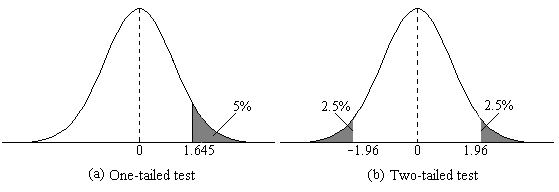


### Two Tailed

In [376]:
# Inputs
sample_mean = 17        # Replace with the sample mean (x̄)
pop_mean = 18           # Population mean under H0 (μ)
sample_std = 4.5        # Sample standard deviation (s)
sample_size = 48        # Sample size (n)

alpha = 0.05          # Significance level

# Calculate the test statistic
tobs = (sample_mean - pop_mean) / (sample_std / np.sqrt(sample_size))

# Degrees of freedom
df = sample_size - 1

# Calculate the two-tailed p-value
p_value = 2 * stats.t.sf(np.abs(tobs), df)


p_value = 2 * stats.t.sf(np.abs(-1.74), 45)


# Output
print(f"Test Statistic (t): {tobs:.4f}")
print(f"P-Value: {p_value:.4f}")

# Decision
if p_value < alpha:
    print("Reject the null hypothesis (H0).")
else:
    print("Fail to reject the null hypothesis (H0).")

Test Statistic (t): -1.5396
P-Value: 0.0887
Fail to reject the null hypothesis (H0).


### One Tailed


In [377]:
# Inputs
sample_mean = 34.66   # Replace with the sample mean (x̄)
pop_mean = 30         # Population mean under H0 (μ)
sample_std = 10.12    # Sample standard deviation (s)
sample_size = 40      # Sample size (n)
alpha = 0.05          # Significance level

# Calculate the test statistic
tobs = (sample_mean - pop_mean) / (sample_std / np.sqrt(sample_size))

# Degrees of freedom
df = sample_size - 1

# One-tailed p-value
# Uncomment the appropriate line for the test direction
p_value = stats.t.sf(tobs, df)  # Right-tailed test (H_a: μ > μ0)
# p_value = stats.t.cdf(t_statistic, df)  # Left-tailed test (H_a: μ < μ0)

# Output
print(f"Test Statistic (t): {tobs:.4f}")
print(f"P-Value: {p_value:.4f}")

# Decision
if p_value < alpha:
    print("Reject the null hypothesis (H0).")
else:
    print("Fail to reject the null hypothesis (H0).")

Test Statistic (t): 2.9123
P-Value: 0.0030
Reject the null hypothesis (H0).


# T Test

## One Sample T Test:

In [378]:
from scipy.stats import ttest_1samp

# Example: Test if the mean of sample data is significantly different from 50
data = [51, 49, 52, 50, 48, 53]

popmean = 50

t_stat, p_value = ttest_1samp(data,popmean=popmean)

print(ttest_1samp(data, popmean=popmean).confidence_interval(0.95))

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

ConfidenceInterval(low=np.float64(48.53668569301968), high=np.float64(52.46331430698032))
T-statistic: 0.6546536707079772
P-value: 0.5416045607931204


## Independent two-sample t-test

In [379]:
from scipy.stats import ttest_ind

# Example: Compare two independent groups
group1 = [5.1, 5.5, 5.8, 6.0]
group2 = [4.9, 5.0, 5.2, 5.1]


t_stat, p_value = ttest_ind(group1, group2, equal_var=False)  # Set equal_var=True if variances are equal

print(ttest_ind(group1, group2, equal_var=False).confidence_interval(0.95))  # Set equal_var=True if variances are equal
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

ConfidenceInterval(low=np.float64(-0.0450806295999896), high=np.float64(1.1450806295999874))
T-statistic: 2.667891875399657
P-value: 0.061672478820370066


## Parried t-test

In [380]:
from scipy.stats import ttest_rel

# Example: Compare two related groups
before = [50, 55, 60, 65]
after = [52, 54, 59, 63]
t_stat, p_value = ttest_rel(before, after)


print(ttest_rel(before, after).confidence_interval(0.95))
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

ConfidenceInterval(low=np.float64(-2.2560793465560987), high=np.float64(3.2560793465560987))
T-statistic: 0.5773502691896258
P-value: 0.604181303590592


In [381]:
# use when mean of two groups are dependant 
# if the hypothesis is not simply that the mean difference is 0 
# in the example the hypothesis is h_0 : mean_current - mean_new = 0.05
currentModel = np.array([7.964, 7.813, 8.299, 8.219, 9.832, 9.829, 9.842, 9.498, 7.023, 8.408])
newModel = np.array([7.932, 7.762 , 8.243, 8.174, 9.782, 9.775, 9.794, 9.445, 6.942, 8.347])

null_difference = 0.05
differences = currentModel - newModel

n = len(differences)
print("n:", n)

meanDiff = np.mean(differences)
stDeviation = np.std(differences, ddof=1)
standardErrorDiff = stDeviation/np.sqrt(n)

tStat = (meanDiff - null_difference) / standardErrorDiff

# Step 4: Compute the p-value
pValueDiff = 2 * (1 - stats.t.cdf(abs(tStat), df=n-1))
print(f"tStat {tStat} pVal {pValueDiff} meandiff {meanDiff} standardErr {standardErrorDiff}")





# OBS!!!! t-statistic and p-value directly if the hypthesis is h_0 : mean_current - mean_new = 0
#t_stat, p_value = stats.ttest_rel(currentModel, newModel)
#print(t_stat, p_value)

n: 10
tStat 0.785740937887215 pVal 0.4522084672096742 meandiff 0.05309999999999988 standardErr 0.003945320716438035


TODO: none vs Paired t-test

# Linear Regression

## OLS Regression Results Explained: 

### Explanation of OLS Regression Results

| Field                  | Description                                                                                 |
|------------------------|---------------------------------------------------------------------------------------------|
| **Dependent Variable** | The outcome variable (`y`) being predicted by the model.                                    |
| **R-squared**          | The proportion of the variance in the dependent variable explained by the independent variable(s). A value of 0.906 means the model explains 90.6% of the variance. |
| **Adjusted R-squared** | Adjusted version of R-squared, accounts for the number of predictors in the model.          |
| **No. Observations**   | The number of data points (observations) used to fit the model. Here, it is 10.             |
| **F-statistic**        | A measure of overall model significance, testing if at least one predictor is non-zero.     |
| **Prob (F-statistic)** | The p-value for the F-statistic, indicating the significance level of the model. A low value (e.g., 0.000022) suggests the model is statistically significant. |
| **Covariance Type**    | Indicates the method used to estimate standard errors. `Nonrobust` means no special adjustments for heteroscedasticity or autocorrelation were made. |
| **Coef.**              | The estimated coefficient for each predictor, representing its effect on the dependent variable. |
| **Std. Err.**          | The standard error of the coefficient, representing the uncertainty of the estimate.         |
| **t**                  | The t-statistic for each coefficient, testing whether the coefficient is significantly different from zero. |
| **P>\|t\|**                 | The p-value for the t-statistic, showing the probability that the coefficient is zero. A small value (e.g., <0.05) indicates statistical significance. |
| **[0.025, 0.975]**     | The 95% confidence interval for the coefficient. It shows the range within which the true value likely lies. |


## Simple Linear Regression

### Model Creation

In [382]:
# data x
x = np.array([0, 0, 2, 2, 4, 4, 6, 6, 8, 8, 12, 12])

# data to be predicted
y = np.array([16, 116, 1170, 841, 2287, 2012, 2653, 3333, 4270, 3999, 5750, 5407])

fit = smf.ols('y ~ x', data=pd.DataFrame({'x':x, 'y':y})).fit()
print(fit.summary(slim=True))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.982
No. Observations:                  12   F-statistic:                     608.4
Covariance Type:            nonrobust   Prob (F-statistic):           2.74e-10
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    160.7286    125.745      1.278      0.230    -119.449     440.906
x            467.5821     18.957     24.666      0.000     425.344     509.821

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


/opt/homebrew/Caskroom/miniconda/base/envs/statistics_exam_prep/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=12 observations were given.
  return hypotest_fun_in(*args, **kwds)


### Confidence Interval:

TODO: Write the formula for how to calculate confidence interval

In [383]:
conf_interval_99 = fit.conf_int(alpha=0.01)
conf_interval_95 = fit.conf_int(alpha=0.05)
conf_interval_90 = fit.conf_int(alpha=0.10)

# Format and display results
print("Confidence Intervals for Regression Coefficients beta_0 and beta_1\n")
print("99% Confidence Interval:")
print(conf_interval_99.to_string(header=["Lower Bound", "Upper Bound"], index=["Intercept (b0)", "Slope (b1)"]))
print("\n95% Confidence Interval:")
print(conf_interval_95.to_string(header=["Lower Bound", "Upper Bound"], index=["Intercept (b0)", "Slope (b1)"]))
print("\n90% Confidence Interval:")
print(conf_interval_90.to_string(header=["Lower Bound", "Upper Bound"], index=["Intercept (b0)", "Slope (b1)"]))

Confidence Intervals for Regression Coefficients beta_0 and beta_1

99% Confidence Interval:
          Lower Bound Upper Bound
Intercept -237.792381  559.249523
x          407.502849  527.661437

95% Confidence Interval:
          Lower Bound Upper Bound
Intercept -119.449283  440.906425
x          425.343742  509.820544

90% Confidence Interval:
          Lower Bound Upper Bound
Intercept  -67.179787  388.636930
x          433.223665  501.940621


### Prediction Interval:

In [385]:
x = 7

new_x = pd.DataFrame({'x': [x]})
# Get 99% prediction intervals for these values
prediction_99 = fit.get_prediction(new_x).summary_frame(alpha=0.01)
# Get 95% prediction interval
prediction_95 = fit.get_prediction(new_x).summary_frame(alpha=0.05)
# Get 90% prediction interval
prediction_90 = fit.get_prediction(new_x).summary_frame(alpha=0.10)


# Print each prediction interval
print("99% Prediction Interval for x = 2.5:")
print(prediction_99[['mean', 'obs_ci_lower', 'obs_ci_upper']])

print("\n95% Prediction Interval for x = 2.5:")
print(prediction_95[['mean', 'obs_ci_lower', 'obs_ci_upper']])

print("\n90% Prediction Interval for x = 2.5:")
print(prediction_90[['mean', 'obs_ci_lower', 'obs_ci_upper']])


99% Prediction Interval for x = 2.5:
          mean  obs_ci_lower  obs_ci_upper
0  3433.803571    2573.59899   4294.008153

95% Prediction Interval for x = 2.5:
          mean  obs_ci_lower  obs_ci_upper
0  3433.803571   2829.041707   4038.565435

90% Prediction Interval for x = 2.5:
          mean  obs_ci_lower  obs_ci_upper
0  3433.803571   2941.865034   3925.742108



### Model validation

1. **Model Assumptions**:
   - Residuals should be **normally distributed** (check the Normal Q-Q plot).
   - Residuals should have **constant variance** (homoscedasticity) and **independence** (check residuals vs. fitted values plot).
   - A high $R^2$ value **does not guarantee valid assumptions**.

2. **Diagnostic Plots**:
   - **Normal Q-Q Plot**:
     - Indicates if residuals follow a normal distribution.
   - **Residuals vs. Fitted Plot**:
     - Identifies non-linearity or dependency of residuals on fitted values.


<br>

| **Observation**                         | **Indication**                                                                 | **Solution**                                                                                   |
|------------------------------------------|--------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------|
| Random scatter in residuals vs. fitted  | Residuals are independent (assumption holds).                                  | None (model is appropriate).               | needed.                                                                              |
| Clear trend or curve                     | Residuals depend on fitted values (non-linearity).                             | Relationship is not linear.                | 
| Funnel shape (increasing spread)         | Heteroscedasticity (variance of residuals changes with fitted values).         | Missing variables or poor model structure. | 
| Clustering in specific areas             | Residuals may not be independent or related to groups.                        | Grouping effects or omitted variables.      |
| Residuals increase/decrease consistently | Indicates bias or incorrect specification (e.g., omitted terms).              | Model is under-specified.                  | 


### Residuals:

In [ ]:
residuals = fit.resid

#print("Residuals:")
#print(residuals)
#print(np.sqrt(fit.mse_resid))

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot residuals against the fitted values
axs[0].scatter(fit.fittedvalues, residuals, color='blue', s=100, alpha=0.7, edgecolor='k', label='Residuals')
axs[0].axhline(0, color='red', linestyle='--', linewidth=2, label='Zero Line')
axs[0].set_xlabel("Fitted Values", fontsize=14)
axs[0].set_ylabel("Residuals", fontsize=14)
axs[0].set_title("Residual Plot", fontsize=16)
axs[0].legend()
axs[0].grid()

# Q-Q plot
stats.probplot(residuals, dist="norm", plot=axs[1])
axs[1].set_title("Q-Q Plot of Residuals", fontsize=16)
axs[1].set_xlabel("Theoretical Quantiles", fontsize=14)
axs[1].set_ylabel("Sample Quantiles", fontsize=14)
axs[1].grid()

# Adjust layout
plt.tight_layout()
plt.show()
plt.show()

# Statistical analysis

| **Analysis Type**              | **Use When**                                                                                  | **Example**                                                                                     |
|---------------------------------|----------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------------------------|
| **Multiple Linear Regression**  | Continuous response, multiple predictors, or goal is prediction                              | Modeling how diet and exercise influence weight.                                               |
| **Independence Test (r × c)**   | Testing association between two categorical variables                                         | Testing if feed type and health status are related.                                             |
| **Paired t-Test**               | Comparing means in **dependent** samples (pre-post measures or matched pairs)                | Comparing weight before and after treatment for the same chickens.                             |
| **One-way ANOVA**               | Comparing means in **three or more independent groups**                                       | Testing if mean weight change differs across three feed types.                                  |
| **t-Test**                      | Comparing means in **two independent groups**                                                | Testing if mean weight change differs between Feed A and Feed B.   

# Simulations

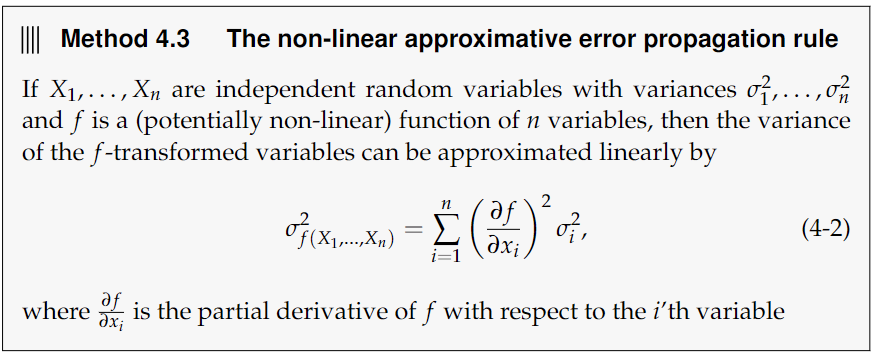

# Proportions

## CHI squared

| **Test**                          | **Purpose**                                                                 | **Null Hypothesis**                                                       |
|-----------------------------------|-----------------------------------------------------------------------------|---------------------------------------------------------------------------|
| **Goodness-of-fit test**          | Compares observed data with a specified theoretical distribution.            | The observed data follows the expected distribution.                      |
| **Test for independence**         | Examines the relationship between two categorical variables in a contingency table. | The two categorical variables are independent of each other.            

**Degrees of Freedom:**
1. **Goodness-of-fit test**:
   - Degrees of freedom = $ \text{df} = k - 1 - c $, where:
     - $ k $ is the number of categories or groups,
     - $ c $ is the number of parameters estimated from the data (often 0 if no parameters are estimated).
  
2. **Test for independence (contingency table)**:
   - Degrees of freedom = $ \text{df} = (r - 1)(c - 1) $, where:
     - $ r $ is the number of rows in the contingency table,
     - $ c $ is the number of columns in the contingency table.




Expected value:
To calculate the expected count in any cell of a contingency table, we use the following formula:

$E_{ij} = \frac{(Row\ Total_i \times Column\ Total_j)}{Grand\ Total}$


In [ ]:
# Given data
row_total = 28176
column_total = 24998
grand_total = 46551

# Calculate the expected number of males in the age group 18-24
expected = (row_total * column_total) / grand_total

print(f"expected value: {expected}")

## Contingency table

In [ ]:
# Example contingency table (rows and columns represent categories)
contingency_table = np.array([[50, 30], [20, 40]])

# Perform the Chi-squared Test for Independence
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Output the results
print(f"Chi-squared Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:\n", expected)

In [ ]:
# Example data
p_hat = 14048/28176  # sample proportion

n = 28176  # sample size
alpha = 0.05  # significance level

# 1. Calculate the 95% Confidence Interval for the proportion using statsmodels
# Calculate the number of successes
count = int(p_hat * n)

# Calculate the confidence interval using statsmodels' proportion_confint method
ci_lower, ci_upper = sm.stats.proportion_confint(count=count, nobs=n, alpha=alpha, method='normal')
print(f"95% Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]")


# 2. Perform Hypothesis Test for the population proportion
p_0 = 0.5  # hypothesized population proportion (null hypothesis)

# Standard error for the population proportion under the null hypothesis
se = np.sqrt(p_0 * (1 - p_0) / n)

# Z-test statistic calculation
z = (p_hat - p_0) / se
print(f"Z-score: {z:.4f}")

# Calculate the p-value for a two-tailed test
p_value = 2 * (1 - stats.norm.cdf(np.abs(z)))
print(f"P-value: {p_value:.4f}")

# Decision rule: Reject null hypothesis if p-value <= alpha
reject_null = p_value <= alpha
print(f"Reject null hypothesis? {reject_null}")

# ANOVA




**If you are comparing 3 groups, and each group has 10 observations:**

$k = 3$ (number of groups)
$n = 30$ (total observations across all groups).


| Source of Variation | Degrees of Freedom | Sums of Squares | Mean Sum of Squares                     | Test-Statistic $F$                   | p-value                 |
|----------------------|--------------------|-----------------|-----------------------------------------|--------------------------------------|-------------------------|
| Treatment           | $k - 1$           | $SS(\text{Tr})$ | $MS(\text{Tr}) = \frac{SS(\text{Tr})}{k-1}$ | $F_{\text{obs}} = \frac{MS(\text{Tr})}{MSE}$ | $P(F > F_{\text{obs}})$ |
| Residual            | $n - k$           | $SSE$           | $MSE = \frac{SSE}{n-k}$                 |                                      |                         |
| Total               | $n - 1$           | $SST$           |                                         |                                      |                         |

\n

| Symbol          | Full Name                 | Description                                                                                     |
|------------------|---------------------------|-------------------------------------------------------------------------------------------------|
| $SST$           | Total Sum of Squares      | Measures the total variability in the data, combining variability due to treatments and errors. |
| $SS(\text{Tr})$ | Treatment Sum of Squares  | Measures the variability between the group means and the overall mean (explained variation).    |
| $SSE$           | Error Sum of Squares      | Measures the variability within each group (unexplained variation or residual variation).       |
| $MS(\text{Tr})$ | Mean Square for Treatment | Represents the average variation between the groups, calculated as $MS(\text{Tr}) = \frac{SS(\text{Tr})}{k-1}$. |
| $MSE$           | Mean Square Error         | Represents the average variation within the groups, calculated as $MSE = \frac{SSE}{n-k}$.     |
| $\hat {\sigma}_{error} $ | estimate of the error standard deviation | Taking the square root of $MSE$ yields the standard deviation,  the original units of measurement, making it easier to interpret. |
| $F_{\text{obs}}$| Observed F-statistic      | A ratio of the variation between groups to the variation within groups, $F_{\text{obs}} = \frac{MS(\text{Tr})}{MSE}$. |
| $P(F > F_{\text{obs}})$ | p-value           | The probability of observing the F-statistic (or something more extreme) under the null hypothesis. |
| $df_{\text{between}}$ | Degrees of Freedom Between Groups | The number of independent comparisons between groups, $df_{\text{between}} = k-1$.           |
| $df_{\text{within}}$ | Degrees of Freedom Within Groups | The number of independent pieces of information within the groups, $df_{\text{within}} = n-k$. |

